In [1]:
import numpy as np
import numba as nb

from orderedTableSearch import locate, locate_grid

In [2]:
#simple linterpolation subroutine with numba
#xgrid ans ygrid should be increasing, and the codes do not check it.

@nb.jit(nopython=True)
def linearinterp(x, x0, x1, y0, y1):

    return (y1 - y0)/(x1 - x0)*(x - x0) + y0

@nb.jit(nopython=True)
def interp_point(x, xgrid, ygrid):
    #ind = locate_grid(x, xgrid)
    ind = locate(x, xgrid)
    return linearinterp(x, xgrid[ind], xgrid[ind+1], ygrid[ind], ygrid[ind+1])

@nb.jit(nopython=True)
def interp_array(x, xgrid, ygrid):
    #x is supposed to be array-like
    ind = locate_grid(x, xgrid)
    M = len(x)
    ans = np.empty(M) #
    
    for i in range(M):
        ix = ind[i]
        ans[i] = linearinterp(x[i], xgrid[ix],  xgrid[ix+1], ygrid[ix],  ygrid[ix+1])
    
    return ans

@nb.generated_jit(nopython=True)
def interp(x, xgrid, ygrid):
    if isinstance(x, nb.types.Float) or isinstance(x, nb.types.Integer) :
        return lambda x, xgrid, ygrid: interp_point(x, xgrid, ygrid)
    else:
        return lambda x, xgrid, ygrid: interp_array(x, xgrid, ygrid)

 0.7988240718841553 seconds


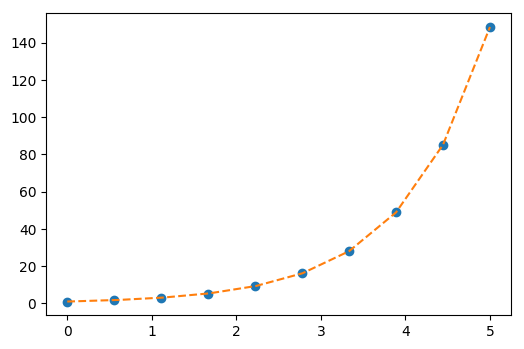

In [3]:
#testcode
if __name__ == '__main__':
    
    %matplotlib inline
    import matplotlib as mpl
    mpl.rc("savefig",dpi=100)
    from matplotlib import pyplot as plt
    import time
    
    xg = np.linspace(0, 5, 10)
    yg = np.exp(xg)
    
    plt.plot(xg, yg, 'o')
    
    xvals = np.linspace(0,5, 1000)
    
    t1 = time.time()
    
    #xinp = interp_array(xvals, xg, yg)
    xinp = interp(xvals, xg, yg)
    
    t2 = time.time()
    print(' {} seconds'.format(t2 - t1))
    
    plt.plot(xvals, xinp, '--')